# Frame the problem
In this notebook we will look at predicting films' overall worldwide box office revenue. 


# Get the data
The dataset is downloaded beforehand through a kaggle competition, and imported from local file. The set contains data from The Movie Database.


In [1]:
import pandas as pd
import numpy as np
import ast

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

# Explore the data to gain insight
Lets start off with getting an overview of the dataset

In [2]:
explore_train = train
explore_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

## Column descriptions

<b>id:</b> Integer unique id of each movie<br/>
<b>belongs_to_collection:</b> Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format.<br/>
<b>budget:</b> Budget of a movie in dollars. 0 values mean unknown.<br/>
<b>genres:</b> Contains all the Genres Name & TMDB Id in JSON Format<br/>
<b>homepage:</b> Contains the official homepage URL of a movie.<br/>
<b>imdb_id:</b> IMDB id of a movie (string).<br/>
<b>original_language:</b> Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.<br/>
<b>original_title:</b> The original title of a movie.<br/>
<b>overview:</b> Brief description of the movie.<br/>
<b>popularity:</b> Popularity of the movie in float.<br/>
<b>poster_path:</b> Poster path of a movie.<br/>
<b>production_companies:</b> All production company name and TMDB id in JSON format of a movie.<br/>
<b>production_countries:</b> Two digit code and full name of the production company in JSON format.<br/>
<b>release_date:</b> Release date of a movie in mm/dd/yy format.<br/>
<b>runtime:</b> Total runtime of a movie in minutes (Integer).<br/>
<b>spoken_languages:</b> Two digit code and full name of the spoken language.<br/>
<b>status:</b> Contains two statuses, released and rumored.<br/>
<b>tagline:</b> Tagline of a movie<br/>
<b>title:</b> English title of a movie<br/>
<b>Keywords:</b> TMDB Id and name of all the keywords in JSON format.<br/>
<b>cast:</b> All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format<br/>
<b>crew:</b> Name, TMDB id, profile path of various kind of crew members job.<br/>
<b>revenue:</b> Total revenue earned by a movie in dollars.<br/>

In [3]:
explore_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
explore_train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0208988,en,Logan,Two slacker wrestling fans are devastated by t...,NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Hot Pursuit,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '53e01d970e0a265a90005716', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


## Check for missing values in the set

In [5]:
explore_train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

## Data plotting
Let's plot data up against revenue and other columns to see how the data correlates.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Numeric fields

#### Budget vs revenue

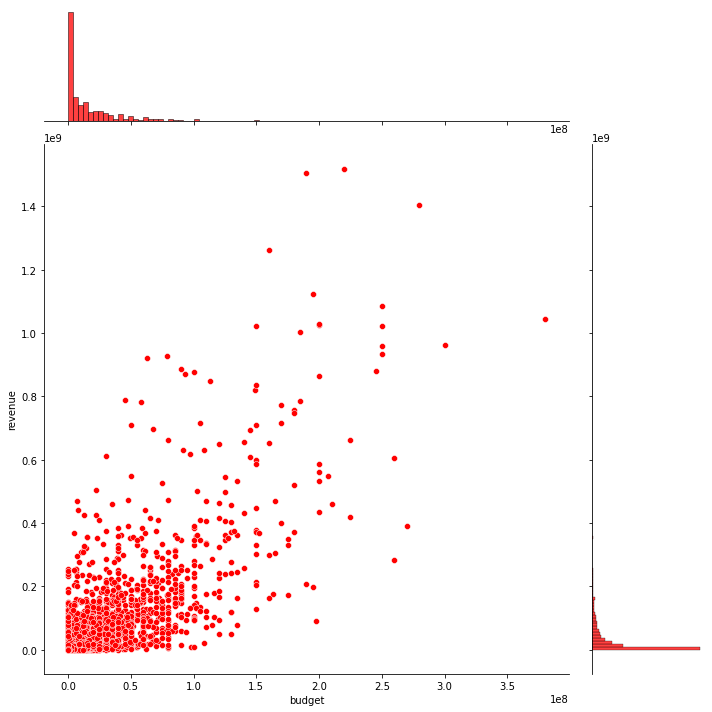

In [7]:
sns.jointplot(x="budget", y="revenue", data=explore_train, height=10, ratio=4, color="r")
plt.show()

#### Popularity vs revenue

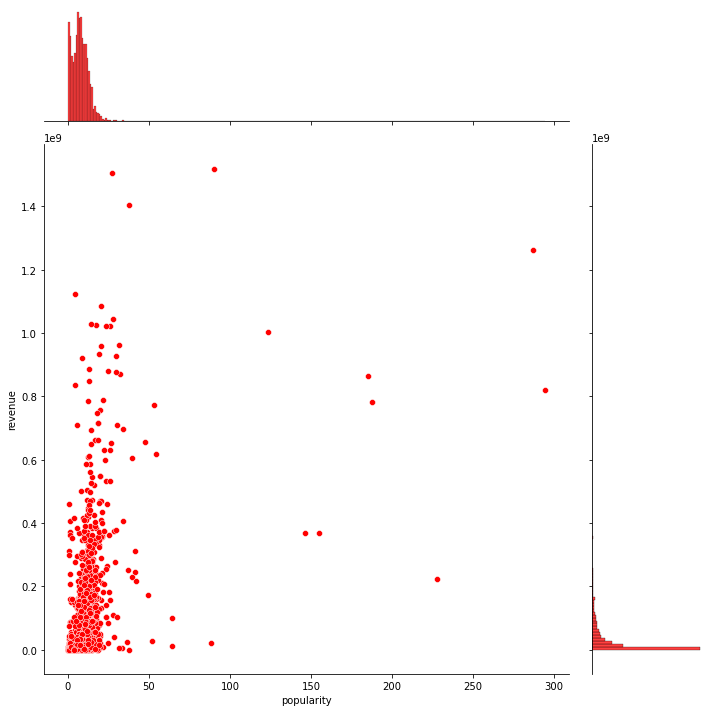

In [8]:
sns.jointplot(x="popularity", y="revenue", data=explore_train, height=10, ratio=4, color="r")
plt.show()

#### Runtime vs revenue

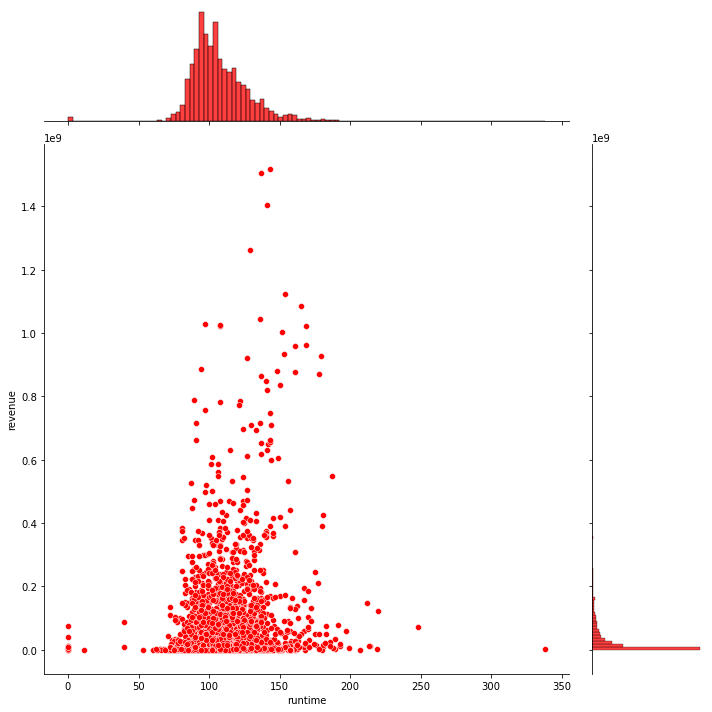

In [9]:
sns.jointplot(x="runtime", y="revenue", data=explore_train, height=10, ratio=4, color="r")
plt.show()

### Release date
Let's extrapolate year, month and day from release date and see how they correlate.

In [10]:
def date_features(df):
    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
    df.loc[ (df['release_year'] <= 19) & (df['release_year'] < 100), "release_year"] += 2000
    df.loc[ (df['release_year'] > 19)  & (df['release_year'] < 100), "release_year"] += 1900

    releaseDate = pd.to_datetime(df['release_date']) 
    df['release_dayofweek'] = releaseDate.dt.dayofweek
    df['release_quarter'] = releaseDate.dt.quarter
    return df

In [11]:
explore_train=date_features(explore_train)

#### Release year vs revenue

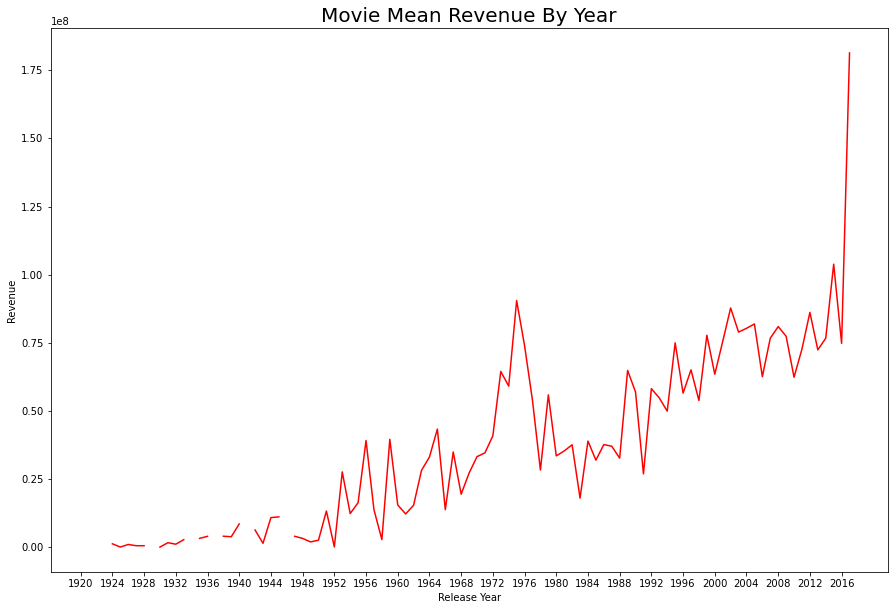

In [12]:
explore_train['meanRevenueByYear'] = explore_train.groupby("release_year")["revenue"].aggregate('mean')
explore_train['meanRevenueByYear'].plot(figsize=(15,10),color="r")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

#### Release month vs revenue

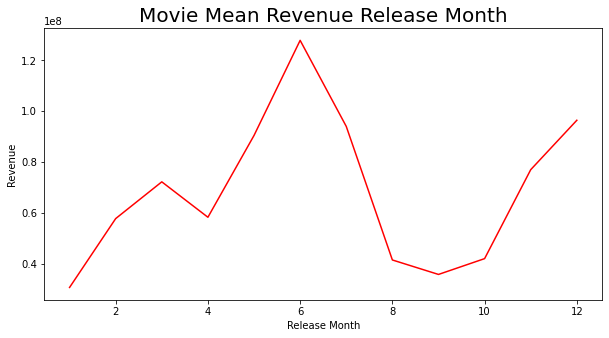

In [13]:
explore_train['meanRevenueByMonth'] = explore_train.groupby("release_month")["revenue"].aggregate('mean')
explore_train['meanRevenueByMonth'].plot(figsize=(10,5),color="r")
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue Release Month",fontsize=20)
plt.show()

### Genres

In [14]:


dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

In [15]:
explore_train = text_to_dict(explore_train)

#### Count movies per genre

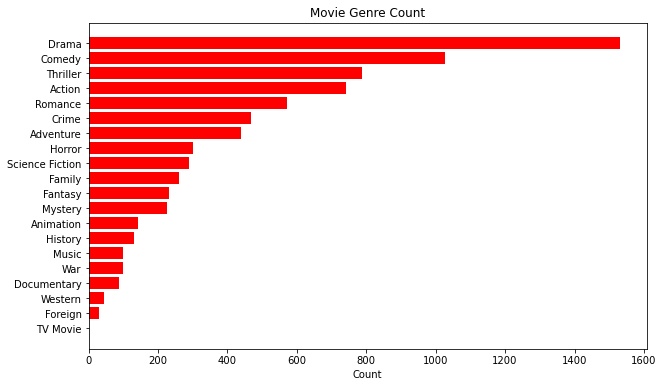

In [16]:
from collections import Counter

explore_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
list_of_genres = list(explore_train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_genres=Counter([i for j in list_of_genres for i in j]).most_common()

fig = plt.figure(figsize=(10, 6))
data=dict(most_common_genres)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='r')
plt.xlabel('Count')
plt.title('Movie Genre Count')
plt.show()

### Production Companies

#### Count movies per 30 most common production companies

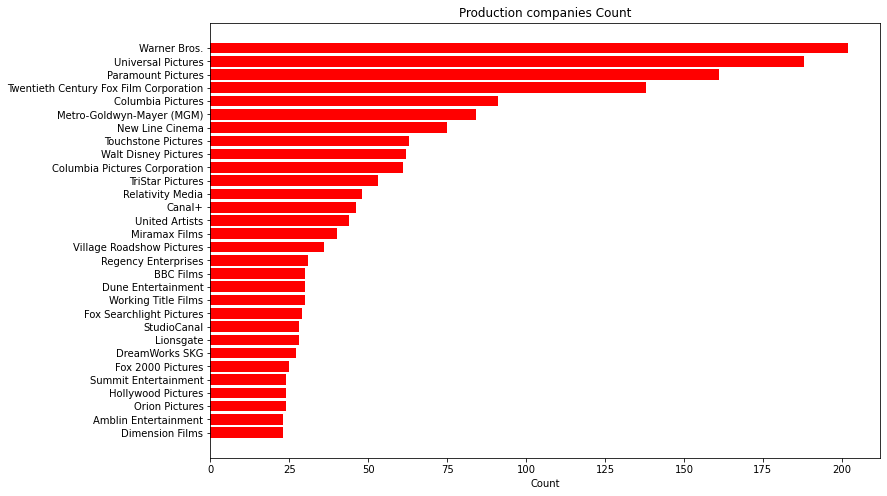

In [17]:
list_of_companies = list(explore_train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_companies=Counter([i for j in list_of_companies for i in j]).most_common(30)

fig = plt.figure(figsize=(12, 8))
data=dict(most_common_companies)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='r')
plt.xlabel('Count')
plt.title('Production companies Count')
plt.show()

### Original language

#### Count original language

C:\Users\kenne\anaconda3\envs\dat158\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


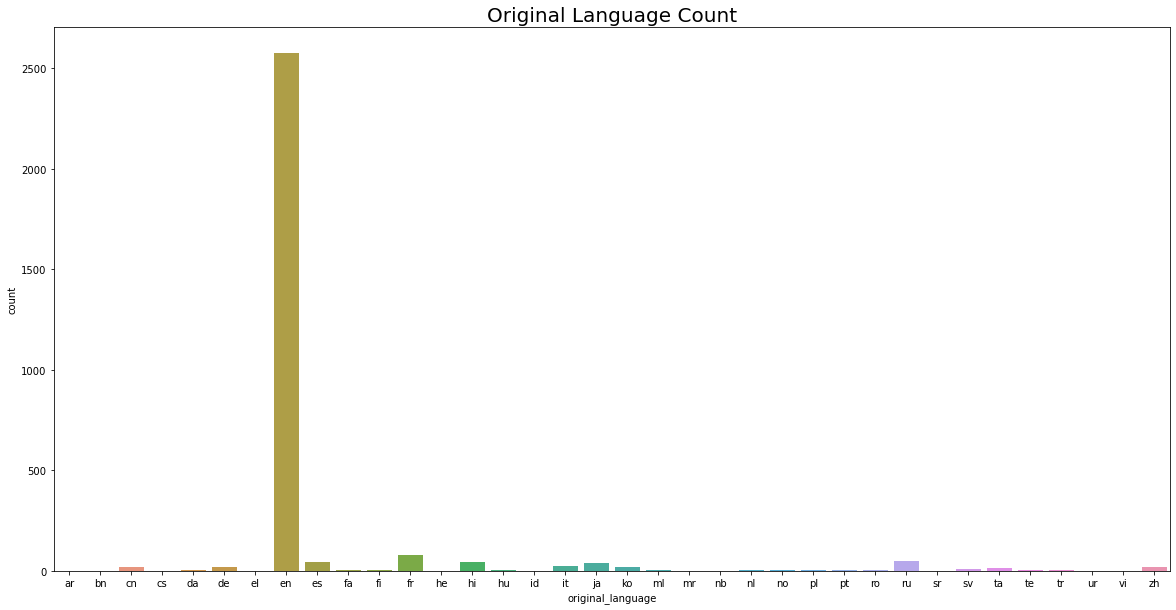

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(explore_train['original_language'].sort_values())
plt.title("Original Language Count",fontsize=20)
plt.show()

Most original languages are english. Perhaps we could just have a is_original_language_english column instead.

In [19]:
def set_original_language_english(data):
    data['isOriginalLanguageEng'] = 0 
    data.loc[ data['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    return data

#### Revenue of movies where original language is english

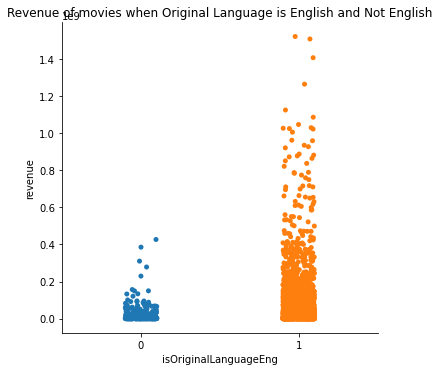

In [20]:
explore_train=set_original_language_english(explore_train)
sns.catplot(x="isOriginalLanguageEng", y="revenue", data=explore_train)
plt.title('Revenue of movies when Original Language is English and Not English');

### Status

#### Count statuses

In [21]:
explore_train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [22]:
explore_train.loc[explore_train['status'] == "Rumored"][['status','revenue']]

,status,revenue
609,Rumored,273644
1007,Rumored,60
1216,Rumored,13418091
1618,Rumored,229000


Not sure how a movie has a revenue when it's yet to release. 

### Homepage

In [23]:
def set_has_homepage(data):
    data['has_homepage'] = 1
    data.loc[pd.isnull(data['homepage']) ,"has_homepage"] = 0
    return data

#### Count films with homepage

C:\Users\kenne\anaconda3\envs\dat158\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


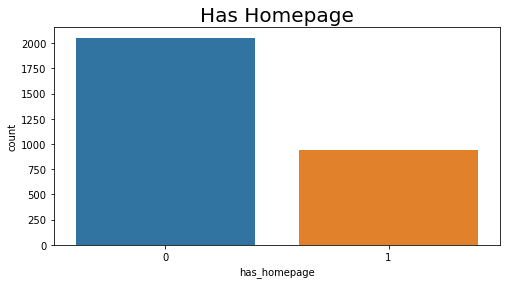

In [24]:
explore_train=set_has_homepage(explore_train)

plt.figure(figsize=(8,4))
sns.countplot(explore_train['has_homepage'].sort_values())
plt.title("Has Homepage",fontsize=20)
plt.show()

#### Revenue of films with homepage

Text(0.5, 1.0, 'Revenue of movies with and without homepage')

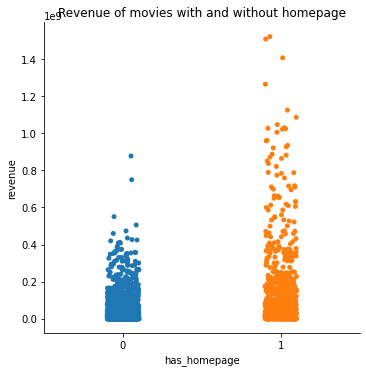

In [25]:
sns.catplot(x="has_homepage", y="revenue", data=train)
plt.title('Revenue of movies with and without homepage')

Seems like having a homepage can increase revenue, maybe as a part of marketing. Could also be that most bigger budget films have a website.

### Heatmap of correlation between fields

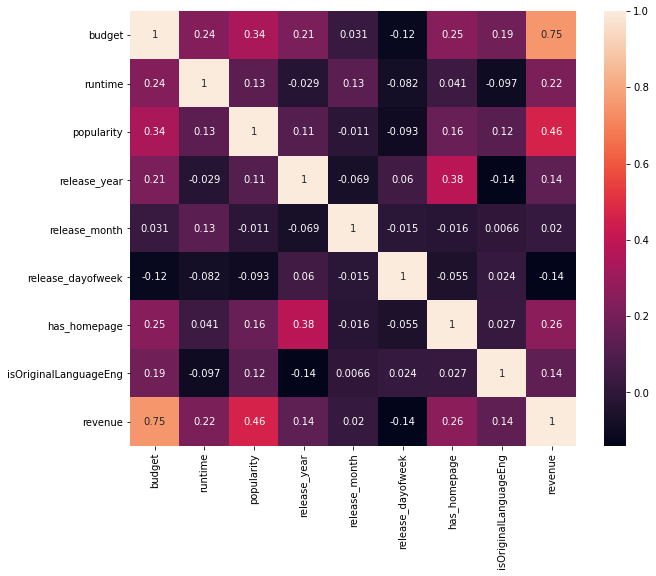

In [26]:
heatmap_train = explore_train[['budget','runtime', 'popularity', 'release_year','release_month','release_dayofweek', 'has_homepage', 'isOriginalLanguageEng',  'revenue']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_train.corr(), annot=True)
plt.show()

We can see that budget and popularity correlates a lot, and on the lesser side we have has_homepage, runtime release_year and isOriginalLanguageEng.

Maybe we can use these fields and create new interesting fields.

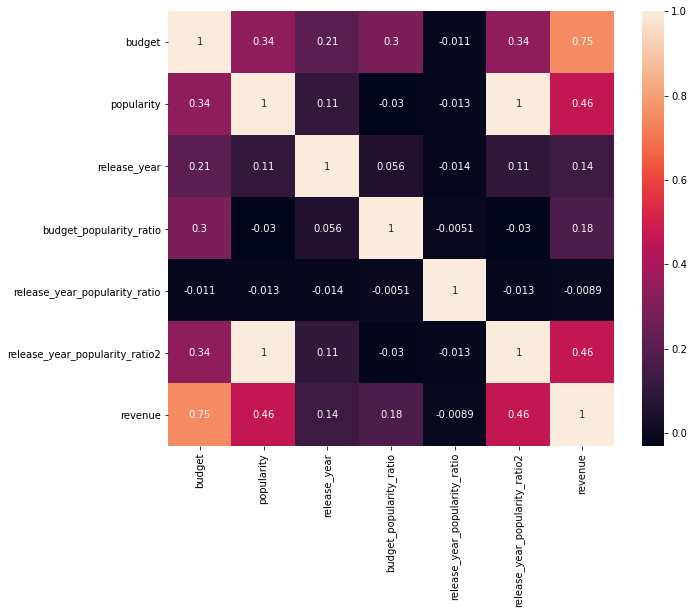

In [27]:
explore_train['budget_popularity_ratio'] = explore_train['budget']/explore_train['popularity']
explore_train['release_year_popularity_ratio'] = explore_train['release_year']/explore_train['popularity']
explore_train['release_year_popularity_ratio2'] = explore_train['popularity']/explore_train['release_year']

heatmap_train = explore_train[['budget','popularity','release_year','budget_popularity_ratio','release_year_popularity_ratio','release_year_popularity_ratio2', 'revenue']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_train.corr(), annot=True)
plt.show()

From the new fields, release_year_popularity_ratio2 seems to be correlating well, then budget_popularity_ratio less so.

# Prepare the data


In [28]:
explore_train2=train

In [29]:
x_test = test
x_train = train

x_train_labels = x_train["revenue"].copy()
x_train = x_train.drop("revenue", axis=1)

In [30]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

import sys
sys.path.append('../')
!{sys.executable} -m pip install -e ../localpackages
from localpackages.custom_transformers.custom_transformers import SelectColumnsTransformer, AddComputedColumns, DataFrameFeatureUnion

full_pipeline = make_pipeline(
    SelectColumnsTransformer(),
    AddComputedColumns(),
    SimpleImputer(missing_values=np.nan, strategy="median"),
    SimpleImputer(missing_values=0, strategy="median")
)

#full_pipeline = DataFrameFeatureUnion([full_pipeline, svd])

Obtaining file:///C:/Users/kenne/DAT158ML/ML_2/boxofficeapp/localpackages
  Attempting uninstall: localpackages
    Found existing installation: localpackages 0.1
    Uninstalling localpackages-0.1:
      Successfully uninstalled localpackages-0.1
  Running setup.py develop for localpackages


In [31]:
from sklearn.model_selection import train_test_split

X = train.drop(['id', 'revenue'], axis=1)
y = np.log1p(train['revenue'])
X_test = test.drop(['id'], axis=1)

train_prepared = full_pipeline.fit_transform(X)
test_prepared = full_pipeline.fit_transform(X_test)

X_train, X_valid, y_train, y_valid = train_test_split(train_prepared, y, test_size=0.2)

# Explore different models

In [32]:
import lightgbm as lgb
import eli5

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)
eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

C:\Users\kenne\anaconda3\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\kenne\anaconda3\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[582]	training's rmse: 1.77216	valid_1's rmse: 2.32173


Weight,Feature
0.4752,Column_0
0.0941,Column_11
0.0930,Column_5
0.0856,Column_10
0.0756,Column_1
0.0610,Column_9
0.0449,Column_2
0.0337,Column_4
0.0265,Column_3
0.0098,Column_6


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

clf = LinearRegression()
scores = cross_val_score(clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

7.457427015336528


In [34]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=0,
                             n_estimators=500)
scores = cross_val_score(regr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

2.1034958714399243


In [35]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

lgb_model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[582]	training's rmse: 1.77216	valid_1's rmse: 2.32173


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
              boosting='gbdt', feature_fraction=0.9, lambda_l1=0.2,
              learning_rate=0.01, max_depth=5, metric='rmse',
              min_data_in_leaf=20, n_estimators=20000, nthread=4, num_leaves=30,
              objective='regression', verbosity=-1)

In [36]:
import xgboost as xgb

xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 7,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
xgb_model = xgb.XGBRegressor(**xgb_params, n_estimators = 20000, 
                             nthread = 4, n_jobs = -1)

In [37]:
xgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

[21:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:15.64188	validation_1-rmse:15.47471
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
Stopping. Best iteration:
[462]	validation_0-rmse:1.35956	validation_1-rmse:2.27729

[21:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.01,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20000, n_jobs=-1,
             nthread=4, num_parallel_tree=1, objective='reg:linear',
             random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=11, silent=True, subsample=0.8, tree_method='exact', ...)

# Fine tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Print the best parameters found
gridParams = {
    "max_depth": [4],
    "min_data_in_leaf": [15],
    'learning_rate': [0.01],
    'num_leaves': [40],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'random_state' : [501], 
    'reg_alpha' : [1],
    'reg_lambda' : [1.4, 1.5]
    }


grid_search = GridSearchCV(lgb_model, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


Random_Search_Params ={
    "max_depth": [4],
    "min_data_in_leaf": [15],
    'learning_rate': [0.01],
    'num_leaves': [40],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'random_state' : [501], 
    }

n_HP_points_to_test = 50

random_search = RandomizedSearchCV(
    estimator=lgb_model, param_distributions= Random_Search_Params, 
    n_iter=n_HP_points_to_test,
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

random_search.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(random_search.best_score_, random_search.best_params_))

# Using parameters already set above, replace in the best from the random search

params['learning_rate'] = random_search.best_params_['learning_rate']
params['max_depth'] = random_search.best_params_['max_depth']
params['num_leaves'] = random_search.best_params_['num_leaves']

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    9.9s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   10.0s finished


{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 4, 'min_data_in_leaf': 15, 'num_leaves': 40, 'objective': 'regression', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1.4}
0.36558559831311754
Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\kenne\anaconda3\envs\dat158\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s finished


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Best score reached: 0.3628729543188276 with params: {'random_state': 501, 'objective': 'regression', 'num_leaves': 40, 'min_data_in_leaf': 15, 'max_depth': 4, 'learning_rate': 0.01, 'boosting_type': 'gbdt'

In [39]:
test_prepared = full_pipeline.fit_transform(test)
final_model = grid_search.best_estimator_

In [40]:
from joblib import dump
dump(final_model, '../models/boxoffice_model.joblib', compress=6)
dump(full_pipeline, '../models/transform_predict.joblib')

['../models/transform_predict.joblib']

# Present your solution

# Launch, monitor and maintain your system

We need to monitor the performance of our model and cause events/triggers if the performance is low. We also need to monitor the data input; if the input data isnt as expected it will cause problems with our model. Further as the data evolves, we need to monitor if we need to update our model. The model can become stale as the data input evolves.

Even though we are going to monitor the input data and performance, we should regardless retrain our models on a regular basis on fresh input data. This will be an automatically scheduled job that runs every so often.

For now the model is deployed to Heroku where you can play around with input data and predict the revenue. Link:https://dat158-boxofficeapp.herokuapp.com/